# Clase Tutorial 11: Reducción de dimensionalidad

- El objetivo de esta clase es introducir el método de reducción de dimensionalidad no lineal t-Distributed Stochastic Neighbor Embedding (t-SNE).

- Es una técnica ampliamente utilizada en la visualización de datos de alta dimensión y en el análisis exploratorio.

## Manifold Learning

- En muchos conjuntos de datos de alta dimensión, hay una estructura de baja dimensión subyacente.

- Esta estructura se supone que es un *manifold* o *variedad curva*, lo que da lugar al problema de "manifold learning" o "reducción de dimensionalidad no lineal".

- Usamos métodos no paramétricos, es decir que no aprendemos un modelo genérico, sino que calculamos una representación (embedding) para cada punto en el conjunto de entrenamiento.
  
- Estos métodos <span style="color: indianred;">no generalizan bien a datos nuevos</span>, pero <span style="color: darkseagreen;">son más flexibles y fáciles de ajustar</span>.

- Util para aprendizaje no supervisado, visualización de datos, y como paso de preprocesamiento para aprendizaje supervisado.


### 🤔 ¿Qué es un "manifold"?

- Un *manifold* es un espacio topológico que es *localmente euclidiano*. Esto significa que en cada punto se parece a un espacio plano, aunque en general pueda ser curvo.

- Ejemplo típico: la superficie de la Tierra
    - Aunque es curva en 3D, en cada punto la Tierra parece plana (como un mapa local en 2D).

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/globe.png">

- Formalmente, un manifold $X$ de $d$ dimensiones, es un espacio donde cada punto $x \in X$ tiene un vecindario topológicamente equivalente a un espacio euclidiano de $d$ dimensiones. 
    - A este espacio en cada punto se le llama __espacio tangente__ y se denota como $T_x = T_xX$.

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/tangent_space.png">


### Enfoques del Manifold Learning

- Existen diversos algoritmos, cada uno con diferentes suposiciones sobre la naturaleza del manifold y distintas características computacionales.

- Se pueden categorizar de la siguiente forma:

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/table201.png">

- Los métodos "no paramétricos" aprenden una representación (embedding) de baja dimensión $z_i$ para cada punto de datos $x_i$, sin aprender una función de mapeo que permita aplicar el modelo a puntos nuevos.

## Motivación

- La mayoría de los datasets exhiben relaciones no lineales entre las features, y los puntos de datos se encuentran en un espacio de alta dimensionalidad.

- Por lo tanto, buscamos una representación de baja dimensionalidad de estos datos de alta dimensionalidad que preserve la relación entre diferentes puntos en el espacio original para visualizar los datos y explorar su estructura inherente, como los clusters.

- Sin embargo, muchos métodos de reducción de dimensionalidad lineales, como PCA, y algoritmos clásicos de manifold embedding, como Isomap, no logran este objetivo.

🚀 <span style="color: indianred;">Objetivo: proyectar los datos de alta dimensionalidad a 2D/3D mientras preservamos las relaciones entre los puntos de datos (es decir, puntos similares permanecen similares y puntos distintos permanecen distintos).</span>

## Stochastic Neighbor Embedding (SNE)

- Los métodos anteriores de reducción de dimensionalidad no lineal asignan un punto de datos en el espacio de alta dimensionalidad a una posición fija en el espacio de baja dimensionalidad.
    - En general, esto no logra capturar correctamente algunos puntos ambiguos que podrían pertenecer a varios vecindarios locales.

- SNE busca capturar mejor la identidad de los vecindarios al considerar la probabilidad de que un punto sea vecino de todos los demás puntos.

- Formalmente, define:

    - Una __matriz de similitud__ de $n \times n$, denominada $P$, __en el espacio de alta dimensionalidad__, cuyos elementos son:

    $$
    p_{j|i} = \frac{\exp\left(-\frac{||x_i - x_j||^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{||x_i - x_k||^2}{2\sigma_i^2}\right)}
    $$ 
    donde $\sigma_i^2$ es la varianza de la distribución gaussiana centrada en $x_i$.
    
    - Y una __matriz de similitud__ $Q$ de $n \times n$ __en el espacio de baja dimensionalidad__, donde las entradas son:

    $$
    q_{j|i} = \frac{\exp(-||y_i - y_j||^2)}{\sum_{k \neq i} \exp(-||y_i - y_k||^2)}
    $$

- A partir de la definición de $P$, notamos que <span style="color: indianred;">SNE se enfoca en la estructura local</span>.

    - Es decir que los puntos más lejanos resultan en valores $p_{ij}$ menores, mientras que los puntos cercanos generan valores $p_{ij}$ mayores.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/t-sne-visual-explanation.webp">

#### Función de costo

- Si los puntos del mapa $y_i$ y $y_j$ modelan correctamente la similitud entre los puntos de datos de alta dimensionalidad $x_i$ y $x_j$, las probabilidades condicionales $p_{j|i}$ y $q_{j|i}$ serán iguales.

- <span style="color: indianred;">Objetivo de SNE:</span> encontrar una representación de datos en baja dimensionalidad que minimice la diferencia entre $p_{j|i}$ y $q_{j|i}$. 

    - Una medida natural de la fidelidad con la que $q_{j|i}$ modela $p_{j|i}$ es la divergencia de Kullback-Leibler. 

    - SNE minimiza la suma de las divergencias de Kullback-Leibler sobre todos los puntos de datos utilizando un método de descenso por gradiente.

$$
C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{j|i} \log\left(\frac{p_{j|i}}{q_{j|i}}\right)
$$

- donde:
    - $P_i$: distribución de probabilidad condicional sobre todos los demás puntos de datos dado el punto de datos $x_i$
    - $Q_i$: distribución de probabilidad condicional sobre todos los demás puntos en el mapa dado el punto en el mapa $y_i$.

- La minimización de la función de costo se realiza usando el método de <span style="color: indianred;">gradiente descendiente</span>. El gradiente resultante es:

  $$
  \frac{dC}{dy_i} = 2 \sum_j (y_i - y_j)(p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j})
  $$

#### Perplexity

- Para elegir el valor adecuado de $\sigma_i^2$, SNE realiza una <span style="color: indianred;">búsqueda binaria para encontrar el valor</span> de $\sigma_i$ que haga que la entropía de la distribución sobre los vecinos sea igual a $\log(k)$.

- $k$ es el hiperparámetro de <span style="color: indianred;">**perplexity**</span>: el número efectivo de vecinos locales. La perplexity se define como:

    $$
    k = 2^{H(P_i)}
    $$

    donde $H(P_i)$ es la entropía de $P_i$ medida en bits:

    $$
    H(P_i) = -\sum_j p_{j|i} \log_2 p_{j|i}
    $$

De esta forma:

- Para datos más densos, se debería elegir una *perplexity* $k$ mayor.
    - Esto resultaría en un valor de $\sigma_i^2$ menor y en un tamaño de vecindario más pequeño. 

- Además, dado que se utiliza el kernel gaussiano, la probabilidad de ser vecino disminuye abruptamente para cualquier punto $x_j$ que esté fuera del vecindario de un punto $x_i$ (y el vecindario se determina justamente mediante $\sigma_i^2$).

#### Crowding Problem

- Aunque SNE preserva las relaciones locales, sufre del "crowding problem". 

- El área del mapa 2D disponible para ubicar puntos de datos moderadamente distantes no será lo suficientemente grande en comparación con el área disponible para ubicar puntos cercanos.

- Intuitivamente, hay menos espacio en una dimensión inferior para acomodar puntos de datos moderadamente distantes que originalmente estaban en una dimensión superior. 

- Como resultado, los grupos globalmente distintos en el espacio de alta dimensionalidad tienden a acercarse entre sí y, muchas veces, no pueden distinguirse unos de otros en una representación 2D o 3D.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

- Para abordar el crowding problem y hacer que SNE sea más robusto a los outliers, se introdujo t-SNE. 
- t-SNE presenta dos cambios principales: 

    1) Una versión simetrica de la función de costo de SNE con gradientes más simples y 
    2) El uso de una distribución *t*-Student en lugar de una gaussiana para calcular la similitud en el espacio de baja dimensionalidad, lo que ayuda a aliviar el crowding problem.

### 1. Nueva versión de la función de costo

- En SNE, $p_{ij}$ no es necesariamente igual a $p_{ji}$, ya que $\sigma_{ij}$ no tiene por qué ser igual a $\sigma_{ji}$. 

- Esto hace que SNE sea susceptible a outliers, ya que un valor atípico $x_i$ tendría un valor de $p_{ji}$ muy chico para todos los demás puntos → su ubicación en el espacio embebido se vuelve irrelevante. 

- Para contrarrestar esto, en t-SNE se redefine $p_{ij}$ como:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

- Así, para todos los puntos de datos $x_i$, se asegura que $\sum_j p_{ij} > \frac{1}{2n}$. 

- Como resultado, cada $x_i$ contribuye de manera significativa a la función de costo, lo que también proporciona un gradiente más simple.

### 2. Nueva distribución para definir $Q$

- En el espacio de alta dimensionalidad, convertimos las distancias en probabilidades usando una distribución gaussiana. 

- En el mapa de baja dimensionalidad, podemos usar una distribución de probabilidad con colas mucho más largas que una gaussiana para convertir las distancias en probabilidades. 

- Esto permite que una distancia moderada en el espacio de alta dimensionalidad se modele fielmente mediante una distancia mucho mayor en el mapa.

- t-SNE utiliza la distribución *t* de Student en lugar de la distribución gaussiana para definir $Q$:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l}(1 + ||y_k - y_l||^2)^{-1}}
$$

- La función de costo de t-SNE se define como:

$$
C = \sum_{i} KL(P_i || Q_i) = \sum_{i=1}^{n} \sum_{j=1}^{n} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

- Esto disminuye el crowding problem, asegurando que las relaciones de proximidad en alta dimensionalidad se conserven en el espacio embebido de menor dimensionalidad.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/tstudent.png">

- La distribución de t-Student tiene colas más largas que una gaussiana → puntos lejanos en alta dimensionalidad se representan como lejanos también en el espacio reducido.

- Con la gaussiana, la separación es más dificil de capturar porque la probabilidad de vecinos cae rápidamente, lo que empuja los puntos moderadamente distantes a estar más cerca de lo deseado.

- El gradiente de la función de costo es:

    $$
    \frac{dC}{dy_i} = 4 \sum_{j=1, j \neq i}^{n} (p_{ij} - q_{ij})(1 + ||y_i - y_j||^2)^{-1} (y_i - y_j)
    $$

    $$
    = 4 \sum_{j=1, j \neq i}^{n} (p_{ij} - q_{ij}) q_{ij} Z (y_i - y_j)
    $$

    $$
    = 4 \left(\sum_{j \neq i} p_{ij} q_{ij} Z (y_i - y_j) - \sum_{j \neq i} q_{ij}^2 Z (y_i - y_j)\right)
    $$

    $$
    = 4 (\text{Atracción} + \text{Repulsión})
    $$

    donde $Z = \sum_{l,s=1, l \neq s}^{n} (1 + ||y_l - y_s||^2)^{-1}$. 

    Pueden encontrar la derivación completa en el apéndice A del [paper de t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

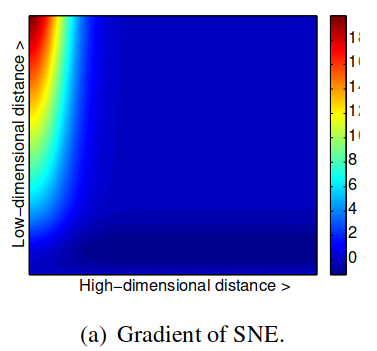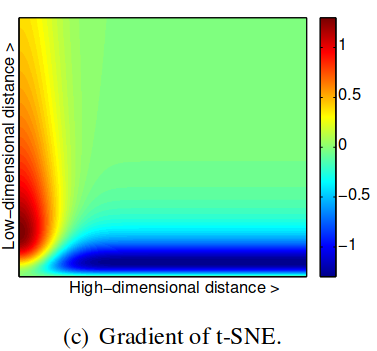

- SNE: 
    - Enfatiza mantener juntos los puntos cercanos en el espacio de baja dimensión, pero tiene una capacidad limitada para separar puntos que son moderadamente lejanos en el espacio de alta dimensión. 

- t-SNE:
    - Diferencia clave: presencia de valores negativos en el gradiente (en tonos azules).
    - Esto representa una _fuerza de repulsión_ adicional que actúa en puntos moderadamente lejanos, facilitando que los puntos más alejados en alta dimensión también se separen en la baja dimensión. 

### Métodos de optimización para t-SNE

- En el paper se presenta en primer lugar un procedimiento relativamente simple de descenso de gradiente para optimizar la función de costo de t-SNE. 

- Este utiliza un término de momentum $\alpha$ para reducir la cantidad de iteraciones necesarias, y funciona mejor si el término de momentum es chico hasta que los puntos en el mapa estén moderadamente bien organizados. 

- Pueden encontrar el pseudocódigo de este algoritmo simple como "Algoritmo 1" en el [paper de t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). 

- Este algoritmo simple puede acelerarse utilizando un esquema de tasa de aprendizaje adaptativo que incremente gradualmente el learning rate en las direcciones donde el gradiente es estable.

Hay dos trucos para mejorar aún más el algoritmo:

1. **Compresión temprana**: 
    - Consiste en forzar a los puntos del mapa a mantenerse cerca unos de otros al comienzo de la optimización. 

    - Cuando las distancias entre los puntos del mapa son pequeñas, es más fácil que los clusters se muevan entre sí.

    - Esto facilita explorar el espacio de posibles organizaciones globales de los datos. 

    - Se implementa agregando una **penalización L2** a la función de costo, proporcional a la suma de las distancias al cuadrado de los puntos del mapa respecto al origen. 

    - La magnitud de este término de penalización y la iteración en la que se elimina se configuran manualmente, pero el comportamiento es bastante robusto frente a variaciones en estos dos parámetros adicionales de optimización.

2. **Exageración temprana**: 
    - Consiste en multiplicar todos los valores de $p_{ij}$ por un número mayor (por ejemplo, 4), en las etapas iniciales de la optimización. 

    - Los valores $p_{ij}$ representan qué tan similares son dos puntos en el espacio de datos original. Al exagerarlos, estamos "enfatizando" o "haciendo más grandes" las similitudes entre los puntos más cercanos, lo cual le dice al algoritmo que preste más atención a esos puntos cercanos entre sí.
    
    - Los valores de $q_{ij}$ representan distancias entre puntos en el espacio de baja dimensión. Estos valores siempre suman 1, así que cuando hacemos grandes los $p_{ij}$, los $q_{ij}$ tienden a quedarse chicos y no logran igualar a los $p_{ij}$.
    
    - Como los $q_{ij}$ no logran igualar a los $p_{ij}$, el algoritmo se esfuerza más en emparejar los valores más grandes de $p_{ij}$, lo cual hace que los puntos muy similares se agrupen de forma compacta y bien separada de otros grupos en el mapa.
    
    - Al final, la exageración temprana ayuda a crear clusters bien definidos, es decir, grupos de puntos similares que están bien separados entre sí. 
    
    - Esto deja mucho espacio vacío entre los grupos, permitiendo que estos clusters se reorganicen de manera más fácil durante la optimización, para encontrar una estructura global clara en el mapa final.

### Limitaciones de t-SNE

[Fuente](https://distill.pub/2016/misread-tsne/): Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00

<span style="color: indianred;">**1. Elección de Perplexity**

- El hiperparámetro de perplejidad debe elegirse cuidadosamente y puede requerir tener cierto conocimiento general sobre los datos. 

- Cambiar la perplejidad puede generar visualizaciones muy diferentes que resaltan distintas estructuras en los datos:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/perplexity.png">

<span style="color: indianred;">**2. Tamaños de clusters no tienen sentido**
- Las coordenadas después del embedding no tienen un sentido inherente y solo pueden ser utilizados para visualización.
- No podemos ver tamaños relativos de clusters en un t-SNE plot.
- El tamaño de los clusters después de hacer los embeddings no necesariamente tienen relación con como eran en el espacio original:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/cluster_size.png">

<span style="color: indianred;">**3. Distancias _entre_ clusters no tienen sentido**

- Dado que t-SNE se enfoca en la estructura local, la estructura global solo se preserva a veces. 
- Por esto, la interpretación de la relación entre clústeres no se puede obtener solo a partir del embedding de t-SNE.
- Los siguientes diagramas muestran tres distribuciones gaussianas de 50 puntos cada una, donde un par está 5 veces más alejado que otro par.

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/distance_1.png">


    - Con una perplexidad de 50, el diagrama proporciona una buena percepción de la geometría global. 
    - Con valores de perplexidad más bajos, los clústeres parecen equidistantes. 
    - Cuando la perplexidad es 100, vemos la geometría global bien, pero uno de los clústeres aparece, falsamente, mucho más pequeño que los otros. 
    
🤔 Dado que la perplexidad de 50 nos dio una buena representación en este ejemplo, __¿podemos siempre establecer la perplexidad en 50 si queremos ver la geometría global?__

    Respuesta: 🚫 No 🚫 

- Si agregamos más puntos a cada clúster, la perplexidad debe aumentar para compensar. 
- Ahora vemos los diagramas de t-SNE para tres clústeres gaussianos con 200 puntos cada uno. 
- En este caso, ninguno de los valores de perplexidad probados ofrece un buen resultado:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/distance_2.png">

- Claramente es una mala noticia que ver la geometría global requiera hacer un fine-tuning de la perplexidad. 
- Los datos del mundo real probablemente tendrían múltiples clústeres con diferentes cantidades de elementos. Puede que no haya un solo valor de perplexidad que capture las distancias en todos los clústeres, y lamentablemente, la perplexidad es un parámetro global.

<span style="color: indianred;">**4. El ruido aleatorio... no siempre se ve aleatorio**

- La típica trampa es pensar que vemos patrones en lo que enrealidad solo son datos aleatorios.
- Los siguientes diagramas muestran datos genuinamente aleatorios, 500 puntos extraídos de una distribución gaussiana unitaria en 100 dimensiones. La imagen de la izquierda es una proyección en las dos primeras coordenadas:

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/noise.png">

    - El gráfico con una perplexidad de 2 parece mostrar clústeres dramáticos. 
    - Si estuvieramos ajustando la perplexidad para resaltar la estructura en los datos, podríamos pensar que dimos en el clavo... pero sabemos que no es así.

- Si miramos los ejemplos anteriores, los valores bajos de perplexidad suelen conducir a este tipo de distribución! 
    - Reconocer estos agrupamientos como ruido aleatorio es una parte importante de la interpretación de los gráficos de t-SNE.


<span style="color: indianred;">**5. Diferentes inicializaciones pueden ofrecer diferentes resultados**

- t-SNE tiene una función de costo que no es convexa. Esto quiere decir que múltiples reinicios con diferentes semillas terminarán en mínimos locales de la divergencia KL. 

En otras palabras, diferentes inicializaciones pueden generar embeddings diferentes:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/results_2.png">

- Sin embargo, 5 ejecuciones con una perplexidad de 50 dan resultados que, son visualmente idénticos (sin considerar diferencias causadas por rotaciones, reflexiones, o transformaciones que no alteran la esencia de los datos):

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/results_50.png">

- Evidentemente, algunos problemas son más fáciles de optimizar que otros. Por lo tanto, a veces es útil probar diferentes semillas y seleccionar el embedding con la menor divergencia KL.

<span style="color: indianred;">**6. Computacionalmente costoso**

- t-SNE es computacionalmente costoso y puede tardar varias horas en conjuntos de datos con millones de muestras, mientras que PCA puede completarse en segundos o minutos.
- $O(N^2)$ (Demostrar 😉!)

## UMAP

- Se han propuesto varias extensiones de t-SNE que intentan mejorar su velocidad, la calidad del espacio de embedding o la capacidad de hacer un embedding en más de 2 dimensiones. 

- Una extensión reciente popular se llama UMAP (que significa “Uniform Manifold Approximation and Projection”). 

- A un alto nivel, es similar a t-SNE, pero tiende a preservar mejor la estructura global y es mucho más rápido. 

- Esto facilita probar múltiples valores de los hiperparámetros. Para un tutorial interactivo sobre UMAP y una comparación con t-SNE, consultar el [siguiente link](https://pair-code.github.io/understanding-umap/)

## Conclusión

- t-SNE se volvió muy popular por motivos claros: es increíblemente flexible y suele encontrar estructuras donde otros algoritmos de reducción de dimensionalidad no pueden. 

- Sin embargo, esa misma flexibilidad lo hace complicado de interpretar. 

- No dejen que la "magia" oculta de t-SNE los aleje de usar la técnica. Es posible estudiar cómo se comporta t-SNE en casos simples para desarrollar una intuición sobre lo que está sucediendo.

- Se recomienda utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA) para reducir el número de dimensiones a una cantidad razonable si el número de características es muy alto. Esto ayudará a suprimir algo de ruido y acelerará el cálculo de las distancias por pares entre las muestras.